In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CONSTANTS
C_TOLERANCE = 1e-5 # stop condition
C_ALPHA = 0.02 # learning rate
C_MAX_EPOCH = 2000 # max epoch count

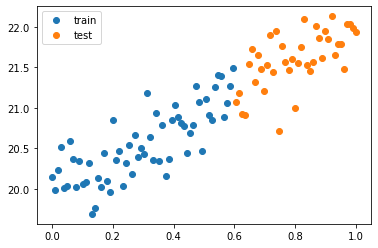

In [3]:
# load data from csv to numpy arrays
data_train = np.genfromtxt('lab_1_train.csv', delimiter = ',')
data_test = np.genfromtxt('lab_1_test.csv', delimiter = ',')

# convert data to suitable format
#  separate train data
train_x = data_train[1:,1] 
train_y = data_train[1:,2]

#  separate test data
test_x = data_test[1:,1] 
test_y = data_test[1:,2]

# data for each parameter is now stored in a separate array

# show data using pyplot
plt.plot(train_x, train_y, 'o', label="train")
plt.plot(test_x, test_y, 'o', label="test")   
plt.legend()
plt.show()

In [4]:
def plot_regression_line(bias, weight, data_x=None, data_y=None, back_data=True, show=True):
    x = np.linspace(0, 1, 2) # x goes from 0 to 1, using 2 points
    plt.plot(x, bias + weight * x, label="y = {0} + {1}x".format(round(bias, 3), round(weight, 3)))
    if back_data:
        if data_x.shape[0] == 0 or data_y.shape[0] == 0:
            print("No data to plot.")
        else:
            plt.plot(train_x, train_y, 'o', label="train")
            plt.plot(test_x, test_y, 'o', label="test") 
    plt.legend()
    if show:
        plt.show()

def cost_function(data_x, data_y, bias, weight):
    return 0.5 * np.sum((data_y - (bias + data_x * weight)) ** 2) / data_x.shape[0]

def calc_y_array(data_x, bias, weight):
    return bias + data_x * weight

def weight_grad(y, y_true, x):
    return np.sum((y - y_true) * x)

def bias_grad(y, y_true, x):
    return np.sum(y - y_true)

def print_epoch(index, cf, bias, weight):
    print("Epoch {0}:\tBias = {1},\tWeight = {2},\tCost function = {3}".format(index, round(bias, 8), 
                                                                            round(weight, 8), round(cf, 8)))

def train(data_x, data_y, bias, weight):
    curr_epoch = 0 # counts epoch
    # save some value for the next epoch
    prev_bias = bias
    prev_weight = weight
    prev_cf = cost_function(data_x, data_y, bias, weight) 
    
    print_epoch(curr_epoch, prev_cf, bias, weight)
    print()
    while (curr_epoch < C_MAX_EPOCH):
        curr_epoch += 1
        
        # predict y
        pred_y = calc_y_array(data_x, bias, weight)
        
        # calc new bias and weight
        bias = bias - C_ALPHA * bias_grad(pred_y, data_y, data_x)
        weight = weight - C_ALPHA * weight_grad(pred_y, data_y, data_x)
        
        # calc new cost function
        cf = cost_function(data_x, data_y, bias, weight)
        print_epoch(curr_epoch, cf, bias, weight)
        print("DIFF:\t\tBias = {0},\tWeight = {1},\tCost function = {2}\n".format(round(bias - prev_bias, 8), 
                                                                             round(weight - prev_weight, 8),  
                                                                             round(cf - prev_cf, 8))) 
        
        # check tolerance
        if (abs(bias - prev_bias) < C_TOLERANCE) and (abs(weight - prev_weight) < C_TOLERANCE):
            break
            
        # update saved values
        prev_cf = cf
        prev_weight = weight
        prev_bias = bias
    else:
        print("\nTraining is over due to exceeding the number of epochs.\n")
    
    return bias, weight

def train_init(data_x, data_y, test_x, test_y):
    # choose random bias and weight
    bias = np.random.rand()
    weight = np.random.rand()
    print("Start bias =\t", bias,"\n", "Start weight =\t", weight, sep="")
    plot_regression_line(bias, weight, back_data=False)
    
    # run training session
    bias, weight = train(data_x, data_y, bias, weight)
    
    # results
    print("\n\n\tTRAINING RESULTS")
    print("Bias = {0}\nWeight = {1}\nCost function (train data) = \t{2}\nCost function (test data) = \t{3}".format(bias, 
                weight, cost_function(data_x, data_y, bias, weight), cost_function(test_x, test_y, bias, weight)))
    plot_regression_line(bias, weight, data_x, data_y, back_data=True, show=True)
    

Start bias =	0.9410072448131951
Start weight =	0.014891204187242879


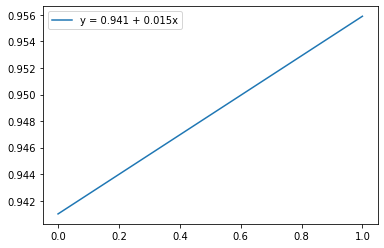

Epoch 0:	Bias = 0.94100724,	Weight = 0.0148912,	Cost function = 192.25626335

Epoch 1:	Bias = 24.46594965,	Weight = 7.09696443,	Cost function = 18.62463648
DIFF:		Bias = 23.5249424,	Weight = 7.08207322,	Cost function = -173.63162687

Epoch 2:	Bias = 17.22858347,	Weight = 4.75243216,	Cost function = 1.9684532
DIFF:		Bias = -7.23736618,	Weight = -2.34453226,	Cost function = -16.65618328

Epoch 3:	Bias = 19.5144046,	Weight = 5.3317103,	Cost function = 0.36175255
DIFF:		Bias = 2.28582114,	Weight = 0.57927813,	Cost function = -1.60670065

Epoch 4:	Bias = 18.85010456,	Weight = 5.01064039,	Cost function = 0.19845845
DIFF:		Bias = -0.66430004,	Weight = -0.3210699,	Cost function = -0.1632941

Epoch 5:	Bias = 19.09777138,	Weight = 4.97310812,	Cost function = 0.17415249
DIFF:		Bias = 0.24766682,	Weight = -0.03753227,	Cost function = -0.02430596

Epoch 6:	Bias = 19.06165865,	Weight = 4.85239348,	Cost function = 0.16374332
DIFF:		Bias = -0.03611273,	Weight = -0.12071464,	Cost function = -0.01040917

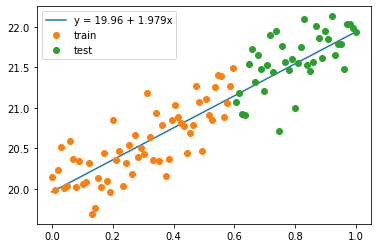

In [5]:
train_init(train_x, train_y, test_x, test_y)